Необходимо ответить на следующие вопросы:
1. Продажи магазина растут или падают?
2. Как меняется средний чек?
3. Какие товарные категории принесли больше всего выручки?
4. Объясните динамику продаж в последние 3 месяца. Какие факторы сильнее всего повлияли на выручку?

Импортиреум необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1.Продажи магазина растут или падают?
- для ответа на данный вопрос достачно таблицы orders.
- из нее берем данные по продажам и датам покупки.

In [2]:
def getOrders():
    query = '''select
    *
    from orders
    '''.format()
    conn = psycopg2.connect("dbname='bw' user='user9' host='88.212.254.23' password='Y7aMlL1x' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

orders_df = pd.DataFrame(getOrders())
orders_df.head()

,id,order_date,ship_date,ship_mode,customer_id,sales,y
0,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,377.970,None
1,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,699.192,None
2,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,91.056,None
3,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,3.928,None
4,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,21.376,None


In [3]:
orders_df.info() #проверям нет ли пустых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5009 non-null   object 
 1   order_date   5009 non-null   object 
 2   ship_date    5009 non-null   object 
 3   ship_mode    5009 non-null   object 
 4   customer_id  5009 non-null   object 
 5   sales        5009 non-null   float64
 6   y            0 non-null      object 
dtypes: float64(1), object(6)
memory usage: 274.1+ KB


In [4]:
orders_df['id'].value_counts() #проверям на дубликаты

CA-2014-100867    1
US-2014-124625    1
CA-2014-110555    1
CA-2017-155292    1
CA-2015-109862    1
                 ..
CA-2017-115651    1
CA-2014-107524    1
CA-2014-116673    1
CA-2016-112025    1
CA-2015-141145    1
Name: id, Length: 5009, dtype: int64

Сгруппируем продажи по годам и свормируем выводы. 

In [5]:
orders_df['year'] = pd.DatetimeIndex(orders_df['order_date']).year
year_rev = orders_df[['year','sales']].groupby('year')['sales'].sum()
year_rev_df = pd.DataFrame(year_rev)
year_rev_df

,sales
year,
2014,484247.4981
2015,470532.5090
2016,609205.5980
2017,733215.2552


In [6]:
def countPer(a,b):
    x = 100*(b-a)/a
    return x

y_15 = countPer(484247.4981,470532.5090)
y_16 = countPer(470532.5090,609205.5980)
y_17 = countPer(609205.5980,733215.2552)
print('Продажи 2015 по сравнению с 2014 упали на: {:.2f}%'.format(y_15))
print('Продажи 2016 по сравнению с 2015 выросли на: {:.2f}%'.format(y_16))
print('Продажи 2017 по сравнению с 2016 выросли на: {:.2f}%'.format(y_17))

Продажи 2015 по сравнению с 2014 упали на: -2.83%
Продажи 2016 по сравнению с 2015 выросли на: 29.47%
Продажи 2017 по сравнению с 2016 выросли на: 20.36%


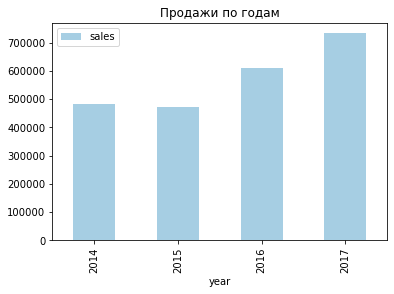

In [7]:
year_rev_df = pd.DataFrame(year_rev)
year_rev_df.plot(kind = 'bar', title = 'Продажи по годам', colormap='Paired')
plt.legend(loc=2)

Вывод:
* Продажи растут 

## 2.Как меняется средний чек?
- для ответа на данный вопрос достачно таблицы orders.
- из нее берем данные по продажам, датам покупки и id заказа

In [8]:
avg_chek = orders_df[['id','order_date','sales']]
avg_chek['year'] = pd.DatetimeIndex(avg_chek['order_date']).year
avg_df = avg_chek[['year','id','sales']].groupby('year').agg({'id':['count'], 'sales':['sum']})
avg_df['id'] = avg_df['id'].astype(float) #меняем тип для вычислений
array1 = np.array(avg_df['id'])  #так как программа выдает ошибку при стандартном добавление нового столбца 
array2 = np.array(avg_df['sales'])  #будем использовать метод assign
array3 = array2/array1
avg = pd.DataFrame(array3)
avg_df = avg_df.assign(avg=avg.values)
avg_df

,id,sales,avg
,count,sum,
year,,,
2014,969.0,484247.4981,499.739420
2015,1038.0,470532.5090,453.306849
2016,1315.0,609205.5980,463.274219
2017,1687.0,733215.2552,434.626707


In [9]:
avg_15 = countPer(499.739420,453.306849)
avg_16 = countPer(453.306849,463.274219)
avg_17 = countPer(463.274219,434.626707)

print('Средний чек 2015 по сравнению с 2014 упал на: {:.2f}%'.format(avg_15))
print('Средний чек 2016 по сравнению с 2015 вырос на: {:.2f}%'.format(avg_16))
print('Средний чек 2017 по сравнению с 2016 упал на: {:.2f}%'.format(avg_17))


Средний чек 2015 по сравнению с 2014 упал на: -9.29%
Средний чек 2016 по сравнению с 2015 вырос на: 2.20%
Средний чек 2017 по сравнению с 2016 упал на: -6.18%


Text(2016, 440, 'падение')

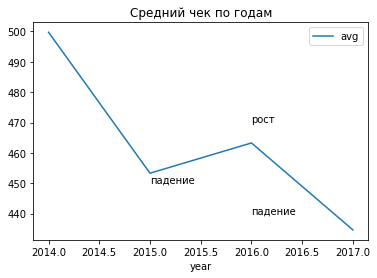

In [10]:
avg_df['avg'].plot( title = 'Средний чек по годам')
plt.legend(loc=1)
plt.text(2015, 450, 'падение')
plt.text(2016, 470, 'рост')
plt.text(2016, 440, 'падение')

Вывод:
* Средний чек незначительно падает с каждым годом

## 3.Какие товарные категории принесли больше всего выручки?
- Нам понадобятся таблицы line_items, products и orders
- Объединим их и проанализируем 

In [11]:
def getItems():
    query = '''with it as (
    select
    l.order_id,
    l.product_id,
    p.category
    from line_items l left join products p on p.id = l.product_id
    )

    select
    r.id,
    r.order_date,
    r.sales,
    it.category
    from orders r left join it it on r.id = it.order_id
    '''.format()
    conn = psycopg2.connect("dbname='bw' user='user9' host='88.212.254.23' password='Y7aMlL1x' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

items_df = pd.DataFrame(getItems())
items_df.head()

,id,order_date,sales,category
0,CA-2016-152156,2016-11-08,993.9000,Furniture
1,CA-2016-152156,2016-11-08,993.9000,Furniture
2,CA-2016-138688,2016-06-12,14.6200,Office Supplies
3,US-2015-108966,2015-10-11,979.9455,Furniture
4,US-2015-108966,2015-10-11,979.9455,Office Supplies


In [12]:
items_no_dubl = items_df.drop_duplicates('id') #уберем дупликаты
items_no_dubl['year'] = pd.DatetimeIndex(items_no_dubl['order_date']).year
items_no_dubl.head()

,id,order_date,sales,category,year
0,CA-2016-152156,2016-11-08,993.9000,Furniture,2016
2,CA-2016-138688,2016-06-12,14.6200,Office Supplies,2016
3,US-2015-108966,2015-10-11,979.9455,Furniture,2015
5,CA-2014-115812,2014-06-09,3714.3040,Furniture,2014
12,CA-2017-114412,2017-04-15,15.5520,Office Supplies,2017


In [13]:
all_it = items_no_dubl.groupby('category')['sales'].sum().sort_values(ascending = False) #посмотрим на общие продажи за 4 года 
pd.DataFrame(all_it)

,sales
category,
Office Supplies,1.060844e+06
Furniture,6.392006e+05
Technology,5.971562e+05


<AxesSubplot:title={'center':'Распределение по категориям за весь период'}, ylabel='sales'>

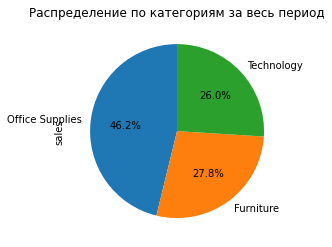

In [14]:
all_it.plot(kind='pie', autopct='%1.1f%%', startangle=90, title= 'Распределение по категориям за весь период')

Рассмотрим более детально по годам

In [15]:
items_2014 = items_no_dubl[items_no_dubl['year'] == 2014]
plot_2014 = items_2014.groupby('category')['sales'].sum().sort_values(ascending = False)
print('Продажи в 2014')
pd.DataFrame(plot_2014)

Продажи в 2014


,sales
category,
Office Supplies,227817.2555
Furniture,128910.9065
Technology,127519.3361


In [16]:
items_2015 = items_no_dubl[items_no_dubl['year'] == 2015]
plot_2015 = items_2015.groupby('category')['sales'].sum().sort_values(ascending = False)
print('Продажи в 2015')
pd.DataFrame(plot_2015)

Продажи в 2015


,sales
category,
Office Supplies,230108.4214
Furniture,142552.1030
Technology,97871.9846


In [17]:
items_2016 = items_no_dubl[items_no_dubl['year'] == 2016]
plot_2016 = items_2016.groupby('category')['sales'].sum().sort_values(ascending = False)
print('Продажи в 2016')
pd.DataFrame(plot_2016)

Продажи в 2016


,sales
category,
Office Supplies,259361.1644
Furniture,185753.0106
Technology,164091.4230


In [18]:
items_2017 = items_no_dubl[items_no_dubl['year'] == 2017]
plot_2017 = items_2017.groupby('category')['sales'].sum().sort_values(ascending = False)
print('Продажи в 2017')
pd.DataFrame(plot_2017)

Продажи в 2017


,sales
category,
Office Supplies,343557.2098
Technology,207673.4470
Furniture,181984.5984


<AxesSubplot:title={'center':'Распределение по категориям 2017'}, ylabel='sales'>

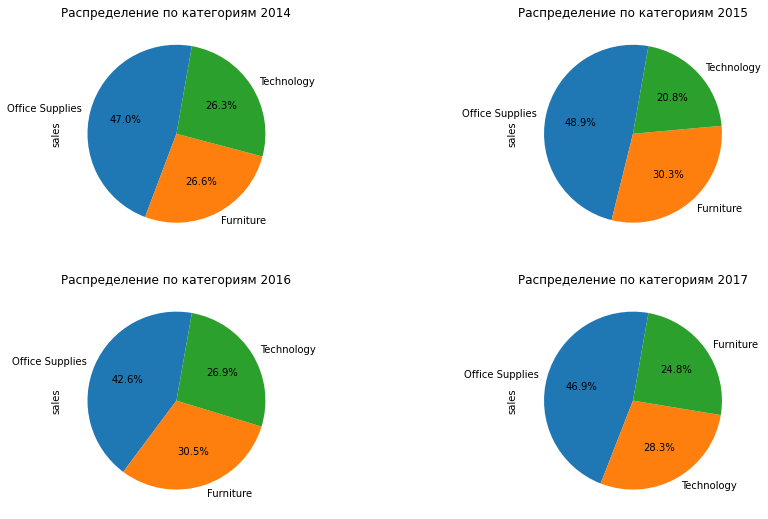

In [19]:
plt.figure(figsize=(15, 9)) #настройм размер подложки

#Вывод графиков
plt.subplot(2, 2, 1)
plot_2014.plot(kind='pie', autopct='%1.1f%%', startangle=80, title= 'Распределение по категориям 2014')
plt.subplot(2, 2, 2)
plot_2015.plot(kind='pie', autopct='%1.1f%%', startangle=80, title= 'Распределение по категориям 2015')
plt.subplot(2, 2, 3)
plot_2016.plot(kind='pie', autopct='%1.1f%%', startangle=80, title= 'Распределение по категориям 2016')
plt.subplot(2, 2, 4)
plot_2017.plot(kind='pie', autopct='%1.1f%%', startangle=80, title= 'Распределение по категориям 2017')

Вывод:
- При анализе было выявлено, что самая прибыльная категория за 4 года работы, это Office Supplies.
- За 4 года планка не опускалась ниже 40% от объема всех продаж.
- Категории Furniture и Technology держутся сравнительно на одном уровне 

## 4. Объясните динамику продаж в последние 3 месяца. Какие факторы сильнее всего повлияли на выручку?

Выделим продажи по месяцам за последний год 

In [20]:
new = orders_df[orders_df['year'] == 2017]
new['order_date']= new['order_date'].astype(str)
new['mon'] =  new['order_date'].apply(lambda x: x[5:7]) 
v = new.groupby('mon')['sales'].sum()
v 

mon
01     43971.3740
02     20301.1334
03     58872.3528
04     36521.5361
05     44261.1102
06     52981.7257
07     45264.4160
08     63120.8880
09     87866.6520
10     77776.9232
11    118447.8250
12     83829.3188
Name: sales, dtype: float64

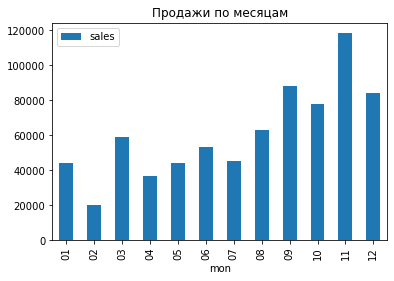

In [21]:
v.plot(kind='bar', title='Продажи по месяцам')
plt.legend(loc=2)

В ноябре мы видим резкий скачек прибыли, по сравнению с октябрем и декабрем

Рассмотрим продажи в октябре, ноябре и декабре более детально 

In [22]:
items_no_dubl['order_date']= items_no_dubl['order_date'].astype(str)
items_no_dubl['mon'] =  items_no_dubl['order_date'].apply(lambda x: x[5:7])
mounth_it = items_no_dubl[items_no_dubl['year'] == 2017]

ok_count = mounth_it[mounth_it['mon']=='10']
ok_sales = ok_count.groupby('category')['sales'].sum()

nov_count = mounth_it[mounth_it['mon']=='11']
nov_sales = nov_count.groupby('category')['sales'].sum()

dec_count = mounth_it[mounth_it['mon']=='12']
dec_sales = dec_count.groupby('category')['sales'].sum()

print('Продажи в Октябре')
display(ok_sales)

print('Продажи в Ноябре')
display(nov_sales)

print('Продажи в Декабре')
display(dec_sales)

Продажи в Октябре


category
Furniture          15344.3530
Office Supplies    22163.9852
Technology         40268.5850
Name: sales, dtype: float64

Продажи в Ноябре


category
Furniture          29498.7488
Office Supplies    46309.7132
Technology         42639.3630
Name: sales, dtype: float64

Продажи в Декабре


category
Furniture          18500.6660
Office Supplies    40343.7938
Technology         24984.8590
Name: sales, dtype: float64

- В октябре проседают продажи Office Supplies
- В декабре проседают продажи Technology
- В ноябре категории Office Supplies,Technology держат высокую планку 

Можно предположить, что в ноябре было большее кол-во заказов, поэтому выручка подскочила

In [23]:
print('Кол-во заказов в октябре: {}'.format(len(ok_count)))
print('Кол-во заказов в ноябре: {}'.format(len(nov_count)))
print('Кол-во заказов в декабре: {}'.format(len(dec_count)))

Кол-во заказов в октябре: 147
Кол-во заказов в ноябре: 261
Кол-во заказов в декабре: 224


Так и есть кол-во заказов в ноябре выросло на 77.5%. В декабре же кол-во заказов падает на 14.2%


Рассмотрим средний чек для выбранного периода 

In [24]:
avg_ok = ok_count['sales'].sum()/len(ok_count)
avg_nov = nov_count['sales'].sum()/len(nov_count)
avg_dec = dec_count['sales'].sum()/len(dec_count)

print('Средний чек в Октябре: {:.2f}'.format(avg_ok))
print('Средний чек в Ноябре: {:.2f}'.format(avg_nov))
print('Средний чек в Декабре: {:.2f}'.format(avg_dec))

Средний чек в Октябре: 529.09
Средний чек в Ноябре: 453.82
Средний чек в Декабре: 374.24


Средний чек в октябре больше чем в ноябре и декабре, хотя выручка гораздо ниже

Построим боксплоты для наглядности распределения прибыли 

<AxesSubplot:title={'center':'Распределение выручки в декабре'}>

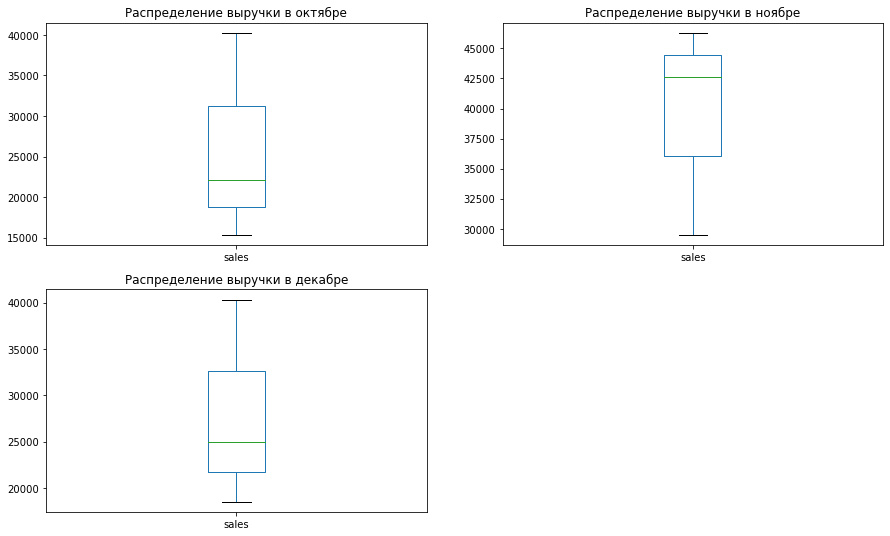

In [25]:
plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
ok_sales.plot(kind='box', title = 'Распределение выручки в октябре')
plt.subplot(2, 2, 2)
nov_sales.plot(kind='box', title = 'Распределение выручки в ноябре')
plt.subplot(2, 2, 3)
dec_sales.plot(kind='box', title = 'Распределение выручки в декабре')

Расмотрев графики можно сказать, что в ноябре было несколько крупных заказов, а также средние суммы закозов выше чем в октябре и ноябре

Вывод:
- Проанализировав имеющиеся данные, можно сделать вывод, что сильнее всего на динамику выручки повлияло кол-во заказов, а также несколько крупных поставок в ноябре